# Dimensionality Reduction

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipyvolume.pylab as p3
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [9]:
# Create an instance of the PCA class
pca = PCA()

In [10]:
mpl.rcParams.update({'font.size':16})

# A function for plotting 3-dimensional data
def plot3d(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data.T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    
def plot3d_live(data):
    fig = p3.figure()
    q = p3.scatter(*data.T, size=1, marker="sphere")
    p3.style.use("dark") # looks better
    p3.show()
    
# A function for summarizing covariancs and correlations
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,raynge)
        plt.yticks(raynge+0.5,raynge)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))

In [11]:
## Generate and plot some random data

Dimension 1 has mean 0.21 and variance 31.8
Dimension 2 has mean 0.32 and variance 23.2
Dimension 3 has mean -0.22 and variance 23


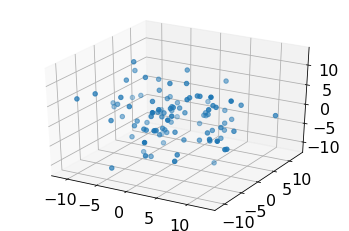

In [12]:
data = 5*np.random.randn(100,3) # 100 data points, each with x, y, z values.  
plot3d(data)
report_mean_var(data)

In [13]:
plot3d_live(data)

In [14]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.random.random((3, 10000))
ipv.quickscatter(x, y, z, size=1, marker="sphere")

[[22.84 -2.22  2.61]
 [-2.22 20.92 -0.17]
 [ 2.61 -0.17 22.03]]
Eigenvalue #1 is 25.8
Eigenvalue #2 is 21.3
Eigenvalue #3 is 18.8


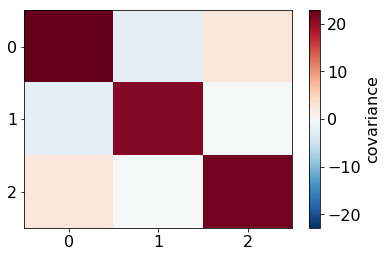

In [11]:
info = {}
info['covariance'] = np.cov(data.T)
summarize(info,'covariance')

[[ 1.    0.03 -0.02]
 [ 0.03  1.   -0.01]
 [-0.02 -0.01  1.  ]]
Eigenvalue #1 is 1.04
Eigenvalue #2 is 0.991
Eigenvalue #3 is 0.97


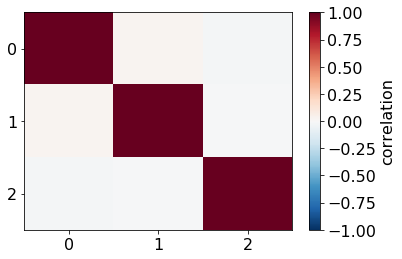

In [7]:
info['correlation'] = np.corrcoef(data.T)
summarize(info,'correlation')

Dimension 1 has mean -0.052 and variance 26.1
Dimension 2 has mean -1.2 and variance 24.8
Dimension 3 has mean -0.89 and variance 26.2


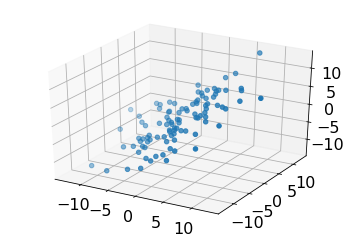

In [8]:
data[:,2] = (data[:,0] + data[:,1])/np.sqrt(2)
plot3d(data)
report_mean_var(data)

In [9]:
plot3d_live(data)

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', dtype='<U5'), geo='sphere', size=array(1), size_selected=array(2.6), x=array([ -1.35449862,   0.65356848,  -0.16727175,   2.31368904,
        -1.43432334,   5.99699331,   5.21196972, -10.13018937,
        -2.43537622,  -3.85388968,   1.0765695 ,   0.28043173,
        10.1396374 ,  -3.66294421,   4.83833822,  -0.50471358,
         4.05043978,  -1.24333214,  -5.38294897,   3.9017223 ,
        -3.45908994,  -3.95301159,  -6.65299296,   5.74150948,
        -1.07704041,   2.0799117 ,   8.28193817,   3.68790781,
        -6.30882292,   3.42054476,  -0.79536266,   3.29185541,
         0.43423933,   3.8821263 ,   8.84953223,  -1.5049835 ,
       -12.39271081,   2.57825142,   3.53433527,   0.09363416,
         7.30270014,  -3.39493666,   6.89363865,   3.62678127,
        -8.26494713,   0.20471173,   8.03236394,  -0.46510413,
         1.23716182,  -0.33888962,  -4.05490197,  -8.41476623,
         8.44798884,  -3.31666196,   0.6747253 ,   1.07382531,
         5.40297142,  -0.74684383,  -1.71336774,  -0.64973104,
       -13.43726021,  -6.20075165,   0.60941672,  -4.11134851,
        -8.14243841,  -6.95763823,  -5.23397025,  -3.88243838,
        -5.43444148,   5.96663402,   2.40371553,   3.24209349,
         0.63146615,  -7.20177572,  -0.66050573,   0.4791764 ,
         0.73600493,  -4.36790954,  -8.40973548,   0.16081045,
         0.28529952,  -2.2215417 ,   3.78926901,   0.63457324,
        14.08563644,   0.96081852,  -3.60648314,  -4.41409424,
         3.09341408,   4.37615652,   2.54545616,   3.4111215 ,
         3.72607547,   3.77999908,  -2.2187344 ,   1.93794091,
       -12.65650209,  -3.99916359,   9.49181827,   2.03108331]), y=array([  1.95124857,   2.88104741,  -1.01682957,   3.08846398,
         1.12019289,  -3.55361603,  -2.1886248 ,   3.29336568,
        -0.33715198,   2.2722523 ,   2.35834304,  -1.83454875,
        -0.36434638,  -4.88475973,   7.94471818,   5.58909368,
         0.07146354,  -9.42900595,   4.96195756,  -9.40087645,
        -4.4738575 ,  -7.17449788,   3.90051908,  -6.27808322,
        -1.7157179 ,  -6.35713281,  -1.43747683,  -1.89359976,
        -3.19179762,   1.02202787, -11.79057686,   7.55333911,
         5.0115726 ,  -1.45518789,   2.49967632,  -1.12324474,
         0.9802357 ,   5.2848178 ,   1.3910874 ,   1.00206242,
        -0.69119627,   0.7093974 ,  11.94267081, -11.4451333 ,
         5.69195087, -10.44953818, -10.26377533,   1.68952049,
         5.37914518,  -3.64986565,  -5.77379783,  -4.49395006,
         3.14909595,  -6.29423342,  -4.86753425,   4.10411564,
         3.83229384,  -4.68427154,   7.65956041,  -3.18427191,
         6.03680918,  -5.07708647,  -6.24469246,  -0.45035814,
       -10.08482589,  -0.03318372,  -3.69584495,   2.08541003,
        -4.17962792,   0.17820897,  -0.56467108,  -1.67407868,
        -9.56917207,   5.01964348,  -0.72019609,  -3.58795089,
         3.26704864,  -3.70631134,   1.28462677,  -2.99832732,
         2.45544097,  -4.2915307 ,   4.44390044,  -3.18144869,
        -1.13162526,  -4.56975245, -11.1495011 ,  -3.1247913 ,
        -4.65090446,  -0.93735427,  -8.45643098,   4.38335402,
         3.56428595,   2.85815915,  -1.38085216,  -9.63156538,
        -7.50174348,   4.14799776,  -5.65453073,  -4.22709587]), z=array([  0.42196594,   2.49935087,  -0.83728607,   3.81989903,
        -0.22212377,   1.72772865,   2.13782769,  -4.83436439,
        -1.96047349,  -1.11838651,   2.42884995,  -1.09892668,
         6.91217457,  -6.04413942,   9.03898586,   3.59519964,
         2.91462579,  -7.54648263,  -0.29768588,  -3.88848919,
        -5.60944093,  -7.86833741,  -1.94629295,  -0.37941493,
        -1.97477834,  -3.02445205,   4.83976503,   1.26876739,
        -6.71795321,  

[[26.38  0.75 19.19]
 [ 0.75 25.02 18.22]
 [19.19 18.22 26.45]]
Eigenvalue #1 is 52.9
Eigenvalue #2 is 24.9
Eigenvalue #3 is -1.14e-15


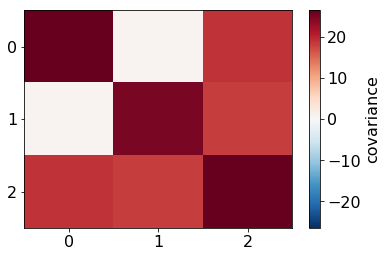

In [10]:
info['covariance'] = np.cov(data.T)
summarize(info,'covariance')

In [11]:
pca.fit(data);

In [12]:
# Apply the rotation to the data
data_rotated = np.dot(pca.components_,data.T).T
report_mean_var(data_rotated)

Dimension 1 has mean -1.2 and variance 52.4
Dimension 2 has mean -0.86 and variance 24.7
Dimension 3 has mean 1.4e-16 and variance 1.64e-30


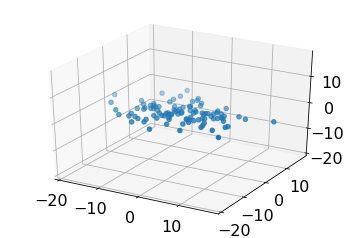

In [13]:
plot3d(data_rotated)

In [14]:
plot3d_live(data_rotated)

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', dtype='<U5'), geo='sphere', size=array(1), size_selected=array(2.6), x=array([  0.51588267,   3.47826717,  -1.16270729,   5.38007752,
        -0.37616061,   2.6745375 ,   3.20179627,  -7.15970457,
        -2.8219864 ,  -1.72990424,   3.40165611,  -1.50168341,
        10.02532064,  -8.51287407,  12.69981386,   4.93294536,
         4.21636754, -10.46663915,  -0.67269716,  -5.17189946,
        -7.9035251 , -11.04244581,  -3.0078769 ,  -0.24351196,
        -2.77554586,  -4.06919456,   7.07712144,   1.92918387,
        -9.57089995,   4.49835368, -12.31067731,  10.73496869,
         5.33109724,   2.55549139,  11.49712833,  -2.63596618,
       -11.73140835,   7.7924837 ,   4.9747    ,   1.07292119,
         6.80227631,  -2.78390893,  18.70216082,  -7.44662859,
        -2.911397  ,  -9.97925774,  -1.7844754 ,   1.17121284,
         6.51150095,  -3.90574794,  -9.78100318, -12.99655019,
        11.71926074,  -9.5326723 ,  -4.05533648,   5.10106424,
         9.26804002,  -5.33199463,   5.71438189,  -3.76999792,
        -7.87036088, -11.29851367,  -5.46499658,  -4.64816519,
       -18.16914098,  -7.1553225 ,  -8.96197838,  -1.94131208,
        -9.63892636,   6.28217693,   1.91024981,   1.68682031,
        -8.68396075,  -2.47849641,  -1.37842877,  -3.00787286,
         3.93903341,  -8.08554348,  -7.35699211,  -2.75889075,
         2.68625931,  -6.45879211,   8.21234027,  -2.45242303,
        13.31694897,  -3.4720926 , -14.56351441,  -7.56581385,
        -1.36794933,   3.56617508,  -5.63951079,   7.76617131,
         7.28997602,   6.65667125,  -3.61785774,  -7.40727801,
       -20.27183114,  -0.04968247,   4.20390779,  -2.04228832]), y=array([  2.35668364,   1.69587683,  -0.64115672,   0.73359477,
         1.79442406,  -6.66513399,  -5.12576967,   9.25076773,
         1.38729154,   4.2747884 ,   1.02412476,  -1.5481595 ,
        -7.08633179,  -1.15785768,   2.63553734,   4.48154153,
        -2.66991717,  -6.15230795,   7.29611252,  -9.59018869,
        -0.99036493,  -2.65985801,   7.36322601,  -8.51257409,
        -0.54753871,  -6.10967561,  -6.63283628,  -3.88257703,
         1.87552346,  -1.54198166,  -8.2036861 ,   3.38508684,
         3.42231788,  -3.68821843,  -4.09645091,   0.17924346,
         9.05740003,   2.18353063,  -1.34495507,   0.6797147 ,
        -5.42145833,   2.80797992,   4.21688245, -10.92042377,
         9.77453724,  -7.88209392, -13.00650608,   1.56481933,
         3.15497808,  -2.47721271,  -1.5532605 ,   2.32616406,
        -3.34521095,  -2.4352484 ,  -4.06106062,   2.31981591,
        -0.79187917,  -2.96959861,   6.8285385 ,  -1.92318564,
        13.50717529,   0.40562704,  -5.03781216,   2.43005208,
        -2.00047851,   4.65263223,   0.77939579,   4.15550546,
         0.55561461,  -3.87895355,  -2.03437698,  -3.42018743,
        -7.51651001,   8.56155945,  -0.08973918,  -2.98126516,
         1.926537  ,   0.1894353 ,   6.60546523,  -2.33025741,
         1.628013  ,  -1.68717038,   0.74620215,  -2.78445821,
       -10.30765747,  -4.03268952,  -5.83880798,   0.65146525,
        -5.52645689,  -3.63654433,  -7.97848994,   0.95553644,
         0.13677392,  -0.42280841,   0.46813686,  -8.44102054,
         2.94847331,   5.76262114, -10.57155992,  -4.49821441]), z=array([-5.64282350e-16, -1.49515896e-16,  1.33226501e-16,  5.27734036e-17,
       -4.41148414e-16,  1.74188257e-15,  1.55853947e-15, -2.78916361e-15,
       -4.17512967e-16, -1.11914033e-15, -3.58669768e-16,  2.16566882e-16,
        2.90253215e-15, -2.79281959e-16,  4.99136029e-16, -9.48675753e-16,
        9.94484189e-16, -8.93624203e-17, -1.88699748e-15,  1.78944725e-15,
       -3.70797355e-18, -1.95469437e-16, -1.74597820e-15,  2.04566118e-15,
       -2.407

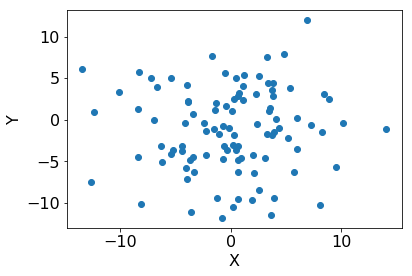

In [15]:
plt.scatter(*data[:,0:2].T);
plt.xlabel('X')
plt.ylabel('Y');

In [16]:
for i,value in enumerate(pca.explained_variance_ratio_):
    print("Dimension %d explains %.2g of the variance" % (i,value))

Dimension 0 explains 0.68 of the variance
Dimension 1 explains 0.32 of the variance
Dimension 2 explains 2.7e-32 of the variance


# Real Data: Gene Expression in the Human Brain

In [17]:
df = pd.read_csv('data/rnaseq_donor9861/RNAseqTPM.csv',header=None,index_col=0)
df.index.name = 'gene'
df = df.loc[df.sum(axis=1)>0] # Only keep genes expressed in the brain
df.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.161960e-06,3.258536e-06,2.641817e-06,3.108662e-06,4.039857e-06,4.333618e-06,4.025451e-06,2.974454e-06,1.881650e-06,4.345292e-06,...,3.453082e-06,4.187005e-06,4.811023e-06,4.161573e-06,6.538805e-06,0.000004,1.079617e-05,5.867319e-06,1.046644e-05,5.198772e-06
A1BG-AS1,5.178069e-06,4.948610e-06,4.238131e-06,4.075050e-06,4.467568e-06,1.745767e-06,5.223524e-06,3.281134e-06,2.337282e-06,3.452217e-06,...,7.639799e-06,5.353240e-06,6.806401e-06,6.018209e-06,2.411404e-06,0.000003,1.581258e-06,9.329990e-07,5.893017e-07,9.203809e-07
A1CF,3.544914e-08,2.427387e-08,6.535814e-08,1.612159e-08,5.255629e-08,2.913073e-08,1.196508e-08,0.000000e+00,0.000000e+00,2.335678e-08,...,1.641368e-07,1.283257e-07,1.290715e-07,1.440339e-07,4.432816e-08,0.000000,1.742187e-08,4.132652e-08,9.118127e-09,1.952420e-08
A2LD1,1.088394e-06,1.922628e-06,1.952536e-06,1.408353e-06,1.463647e-06,1.854015e-06,1.664973e-06,8.527213e-07,7.791031e-07,1.287892e-06,...,1.816362e-06,1.454675e-06,1.491791e-06,8.507376e-07,2.084369e-06,0.000002,2.587033e-06,2.571861e-06,1.962172e-06,2.477960e-06
A2M,4.272174e-05,5.538482e-05,6.106004e-05,3.081461e-05,6.707973e-05,6.928951e-05,5.553703e-05,6.921014e-05,7.029073e-05,6.541462e-05,...,6.027224e-05,7.676719e-05,5.149413e-05,6.032053e-05,1.455172e-04,0.000114,1.114684e-04,1.120086e-04,9.890017e-05,1.590071e-04


In [18]:
annotation = pd.read_csv('data/rnaseq_donor9861/SampleAnnot.csv')
annotation.head()

,RNAseq_sample_name,replicate_sample,sample_name,well_id,microarray_run_id,ontology_color,main_structure,sub_structure,ontology_structure_id,ontology_structure_acronym,...,brain,million_clusters,clip_percentage,RIN_RNA_quality,rnaseq_run_id,A.Pct,C.Pct,G.Pct,T.Pct,N.Pct
0,S010002_L7.LB16,No,S010002,105,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,36.467,6.56,8.0,H15699,25.41,25.22,24.15,25.21,0.01
1,S010003_L7.LB19,No,S010003,113,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,52.991,24.45,7.5,V00091,20.87,7.14,26.30,24.34,23.40
2,S010006_L8.LB27,No,S010006,193,275-104,#FF7B62,PL,SPL,4099,SPL-i,...,1,37.405,4.23,7.2,H15699,25.88,24.43,23.74,25.95,0.01
3,S010007_L4.LB20,No,S010007,145,275-104,#FF5D62,PL,AnG-s,4113,AnG-s,...,1,29.974,21.40,6.0,H15699,26.29,25.52,24.35,23.84,0.01
4,S010017_L1.LB2,No,S010017,114,275-104,#E8D959,FL,SFG-l,4027,SFG-l,...,1,34.290,2.26,7.3,H16345,24.97,24.95,24.71,25.36,0.01


In [19]:
df.columns = annotation['sub_structure']
df.head()

sub_structure,SPL,SPL,SPL,AnG-s,SFG-l,OrbGyri,GRe,OrbGyri,OrbGyri,GRe,...,CbCx,CbCx,CbCx,CbCx,Caudate,Putamen,Putamen,GP,GP,Caudate
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.161960e-06,3.258536e-06,2.641817e-06,3.108662e-06,4.039857e-06,4.333618e-06,4.025451e-06,2.974454e-06,1.881650e-06,4.345292e-06,...,3.453082e-06,4.187005e-06,4.811023e-06,4.161573e-06,6.538805e-06,0.000004,1.079617e-05,5.867319e-06,1.046644e-05,5.198772e-06
A1BG-AS1,5.178069e-06,4.948610e-06,4.238131e-06,4.075050e-06,4.467568e-06,1.745767e-06,5.223524e-06,3.281134e-06,2.337282e-06,3.452217e-06,...,7.639799e-06,5.353240e-06,6.806401e-06,6.018209e-06,2.411404e-06,0.000003,1.581258e-06,9.329990e-07,5.893017e-07,9.203809e-07
A1CF,3.544914e-08,2.427387e-08,6.535814e-08,1.612159e-08,5.255629e-08,2.913073e-08,1.196508e-08,0.000000e+00,0.000000e+00,2.335678e-08,...,1.641368e-07,1.283257e-07,1.290715e-07,1.440339e-07,4.432816e-08,0.000000,1.742187e-08,4.132652e-08,9.118127e-09,1.952420e-08
A2LD1,1.088394e-06,1.922628e-06,1.952536e-06,1.408353e-06,1.463647e-06,1.854015e-06,1.664973e-06,8.527213e-07,7.791031e-07,1.287892e-06,...,1.816362e-06,1.454675e-06,1.491791e-06,8.507376e-07,2.084369e-06,0.000002,2.587033e-06,2.571861e-06,1.962172e-06,2.477960e-06
A2M,4.272174e-05,5.538482e-05,6.106004e-05,3.081461e-05,6.707973e-05,6.928951e-05,5.553703e-05,6.921014e-05,7.029073e-05,6.541462e-05,...,6.027224e-05,7.676719e-05,5.149413e-05,6.032053e-05,1.455172e-04,0.000114,1.114684e-04,1.120086e-04,9.890017e-05,1.590071e-04


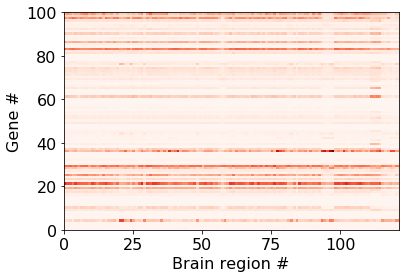

In [20]:
first_n_genes = 100
plt.pcolor(df.iloc[:first_n_genes,:],cmap='Reds')
plt.xlabel('Brain region #')
plt.ylabel('Gene #');

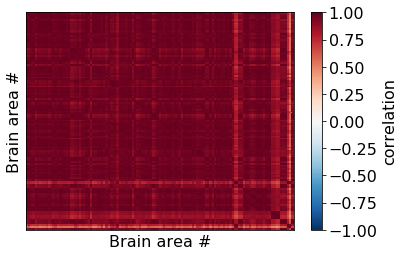

In [21]:
info['correlation'] = df.corr().values
summarize(info,'correlation',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');

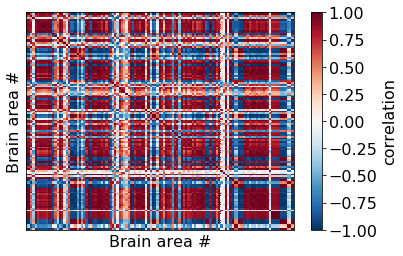

In [22]:
df_mean_subtracted = df.sub(df.mean(axis=1),axis=0)
info['correlation'] = df_mean_subtracted.corr().values
summarize(info,'correlation',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');

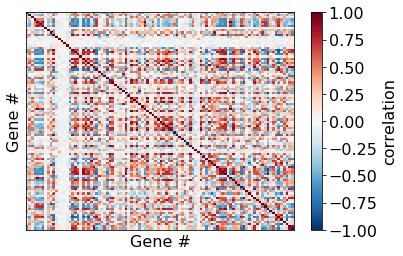

In [23]:
info['correlation'] = df.iloc[:first_n_genes,:].T.corr().values
summarize(info,'correlation',quiet=True)
plt.xlabel('Gene #')
plt.ylabel('Gene #');

In [24]:
# Show that the long way (x1) and the short way (x2) are identical ways 
# of achieving the transformation using the PCA components.  
pca.fit(df_mean_subtracted.values)
x1 = np.dot(pca.components_,df_mean_subtracted.values.T).T
x2 = pca.transform(df_mean_subtracted.values)
np.allclose(x1,x2) # True if x1 and x2 are basically identical

True

In [25]:
df_brain_regions = df_mean_subtracted.copy()
df_brain_regions.columns = ["Areas %d" % (i+1) for i in range(df.shape[1])]
df_brain_regions[:] = pca.fit_transform(df_mean_subtracted.values)
df_brain_regions.head()

,Areas 1,Areas 2,Areas 3,Areas 4,Areas 5,Areas 6,Areas 7,Areas 8,Areas 9,Areas 10,...,Areas 112,Areas 113,Areas 114,Areas 115,Areas 116,Areas 117,Areas 118,Areas 119,Areas 120,Areas 121
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.631718e-06,7.300959e-06,1.941912e-06,1.180625e-06,9.226217e-06,4.277310e-07,4.063942e-06,-3.260736e-06,-1.205496e-07,7.463616e-07,...,4.002339e-07,9.567825e-07,1.960364e-07,1.122629e-07,2.377683e-07,3.066212e-07,-1.219053e-08,-2.825430e-07,6.433969e-07,6.537902e-17
A1BG-AS1,-1.007614e-05,-6.342672e-06,2.226909e-06,-2.536134e-06,-9.726853e-07,-4.692973e-07,-1.854578e-06,-3.521099e-06,-3.734407e-06,-2.929747e-06,...,-2.116100e-07,4.020753e-07,2.641395e-07,-6.485877e-07,4.411775e-07,-2.141004e-07,-9.351851e-07,6.424135e-07,7.714693e-07,4.685894e-18
A1CF,-8.421455e-08,-4.468827e-08,-9.445651e-08,-1.817904e-07,1.198635e-08,1.305020e-08,-7.171479e-08,3.702728e-09,1.546003e-08,-1.125792e-08,...,-1.983802e-08,-2.645643e-08,1.931111e-08,-2.251174e-08,-1.403621e-08,-1.046514e-08,4.335789e-08,1.563757e-08,2.562515e-10,-1.860820e-17
A2LD1,4.293387e-06,1.129738e-06,4.609271e-07,-1.172062e-06,3.401841e-07,7.971553e-07,-1.460620e-07,1.353405e-06,-1.126557e-06,1.062021e-07,...,-3.469186e-07,-4.760331e-08,-6.314490e-09,2.741939e-08,2.001911e-08,-2.413963e-07,3.721686e-07,-4.822753e-07,1.607700e-07,-1.359041e-18
A2M,3.409440e-04,-4.035321e-05,-3.367484e-05,-5.519368e-05,-1.244009e-05,5.348184e-05,1.896619e-05,-2.706028e-05,-5.530681e-05,8.543998e-05,...,-1.723708e-06,2.237673e-06,-4.542874e-06,-1.623320e-06,-2.347801e-06,2.920303e-06,-1.768273e-06,-4.297279e-06,2.202305e-07,-1.891019e-18


In [26]:
for i,value in enumerate(pca.explained_variance_ratio_[:5]):
    print("Dimension %d explains %.2g of the variance" % (i,value))

Dimension 0 explains 0.8 of the variance
Dimension 1 explains 0.17 of the variance
Dimension 2 explains 0.0081 of the variance
Dimension 3 explains 0.0061 of the variance
Dimension 4 explains 0.0051 of the variance


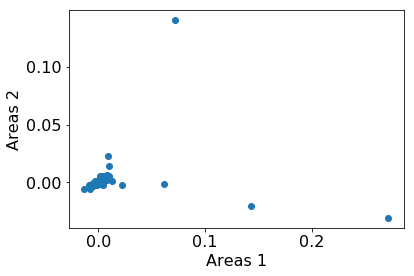

In [27]:
df_brain_regions.plot(x='Areas 1', y='Areas 2', style='o')
plt.legend().remove()
plt.ylabel('Areas 2');

In [28]:
df_brain_regions['Areas 1'].sort_values(ascending=False).head()

gene
MTRNR2L2    0.271509
MTRNR2L8    0.143202
MBP         0.071651
MTRNR2L9    0.061746
MTRNR2L1    0.021734
Name: Areas 1, dtype: float64

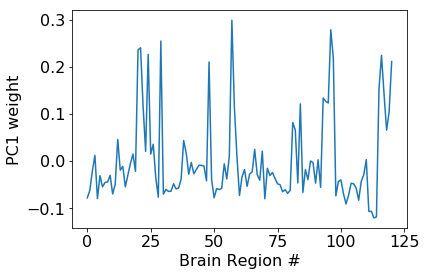

In [29]:
plt.plot(pca.components_[0,:])
plt.xlabel('Brain Region #')
plt.ylabel('PC1 weight');

In [30]:
components = pd.DataFrame(pca.components_.T,
             index=annotation['sub_structure'],
             columns=['PC %d' % (i+1) for i in range(pca.components_.shape[0])])
components.sort_values('PC 1',ascending=False).head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,PC 121
sub_structure,,,,,,,,,,,,,,,,,,,,,
Putamen,0.298744,-0.116427,-0.092977,0.011491,-0.053716,-0.195162,0.064573,0.083254,0.058963,0.062777,...,-0.024148,-0.013657,0.036123,-0.000240,0.008615,-0.008409,-0.011035,-0.000580,-0.000237,-0.090909
Putamen,0.278546,-0.025667,0.002675,-0.073723,-0.089969,0.109159,0.376340,-0.118206,-0.115596,0.068912,...,-0.007086,0.011670,0.045173,-0.025585,0.031475,0.032850,-0.018271,-0.000839,-0.002953,-0.090909
str_V1,0.254606,-0.077438,0.067041,-0.110317,-0.111394,0.038653,-0.158829,-0.213281,0.007997,0.036290,...,0.008050,-0.008077,-0.015956,0.003596,-0.007091,0.034863,0.013900,-0.029818,0.009660,-0.090909
str_V1,0.240276,-0.127536,0.054757,-0.121269,-0.090588,0.074162,-0.131189,-0.151238,-0.060960,0.076080,...,-0.038512,0.175587,0.058636,-0.006864,0.006450,0.075650,-0.054604,0.013525,-0.021143,-0.090909
str_V1,0.235965,-0.124065,0.074016,-0.148068,-0.098849,0.068627,-0.101471,-0.153368,-0.067507,0.114847,...,0.054873,-0.129045,-0.019673,0.006145,0.031359,-0.096357,0.030271,-0.011819,0.004870,-0.090909


In [31]:
df_brain_regions['Areas 2'].sort_values(ascending=False).head()

gene
MBP      0.140400
GFAP     0.022655
PLP1     0.014284
APOE     0.006395
PTGDS    0.005751
Name: Areas 2, dtype: float64

In [32]:
components.sort_values('PC 2',ascending=False).head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,PC 121
sub_structure,,,,,,,,,,,,,,,,,,,,,
GP,0.104509,0.664640,0.115550,-0.030640,-0.084690,-0.188458,-0.233672,-0.256109,0.281856,0.081115,...,-0.022389,0.008680,-0.000613,-0.002726,0.001254,-0.000166,0.002266,0.001546,-0.002748,-0.090909
GP,0.123190,0.371058,-0.107449,-0.012094,-0.083785,-0.019331,0.125157,0.220753,-0.139688,-0.092991,...,-0.014973,0.023659,0.001851,0.003714,0.008957,0.004054,0.019773,0.019478,-0.007599,-0.090909
GP,0.126822,0.343255,-0.084166,-0.009173,-0.056886,0.016592,0.032006,0.083765,-0.188229,0.163623,...,0.044815,-0.043625,-0.030811,0.005601,0.010070,-0.037123,0.010096,-0.014613,0.011864,-0.090909
GP,0.065505,0.330852,-0.149701,0.063229,0.161410,-0.013050,-0.151370,0.300900,-0.264235,0.151272,...,0.000660,0.007113,0.023355,-0.006702,-0.017739,0.022820,-0.025839,-0.006861,-0.000596,-0.090909
PoG-cs,-0.002876,0.131118,0.124574,-0.071965,0.012689,0.151562,0.097442,0.004635,0.045107,-0.174347,...,-0.085435,-0.048482,0.000974,0.031431,-0.016844,0.012187,-0.013131,-0.078190,-0.001566,-0.090909


## Now find linear combinations of genes

In [33]:
df_genes = df.T.copy()
df_genes = df_genes.iloc[:,:df.shape[1]] # Make square
df_genes.columns = ["Genes %d" % (i+1) for i in range(df.shape[1])]
df_genes[:] = pca.fit_transform(df.T.values)
df_genes.head()

,Genes 1,Genes 2,Genes 3,Genes 4,Genes 5,Genes 6,Genes 7,Genes 8,Genes 9,Genes 10,...,Genes 112,Genes 113,Genes 114,Genes 115,Genes 116,Genes 117,Genes 118,Genes 119,Genes 120,Genes 121
sub_structure,,,,,,,,,,,,,,,,,,,,,
SPL,-0.025423,-0.001122,0.000010,-0.000331,-0.001189,-0.002056,-0.000797,0.000100,0.000451,-0.000965,...,0.000007,-0.000040,-0.000041,-0.000028,-0.000027,-2.876286e-07,0.000011,-0.000013,2.843645e-07,1.316434e-17
SPL,-0.020199,0.000778,0.001768,-0.000170,-0.001818,-0.001093,0.000447,0.001471,0.000412,0.000172,...,0.000015,0.000022,0.000038,0.000035,0.000058,3.994736e-05,-0.000072,0.000046,-1.787567e-06,1.316434e-17
SPL,-0.006785,-0.007215,0.000243,-0.000322,-0.000581,-0.000668,-0.001741,0.000770,0.000850,-0.000537,...,-0.000044,0.000025,-0.000007,-0.000079,0.000045,3.426148e-05,-0.000016,-0.000004,2.956026e-06,1.316434e-17
AnG-s,0.003971,-0.010314,-0.000607,-0.001973,-0.000339,-0.000144,-0.001842,-0.000886,-0.000052,0.000536,...,0.000021,-0.000035,-0.000033,-0.000022,-0.000007,-8.730624e-06,0.000006,0.000013,-4.457149e-06,1.316434e-17
SFG-l,-0.025889,-0.001550,-0.003035,0.000933,0.000244,0.000584,0.000567,0.000069,0.000025,-0.000923,...,-0.000036,0.000009,-0.000049,-0.000004,-0.000003,-1.115350e-05,-0.000019,0.000021,-2.782308e-06,1.316434e-17


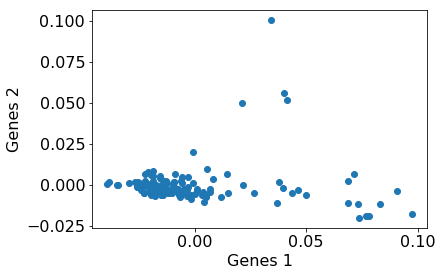

In [34]:
df_genes.plot(x='Genes 1', y='Genes 2', style='o')
plt.legend().remove()
plt.ylabel('Genes 2');

In [35]:
!pip install seaborn
import seaborn as sns

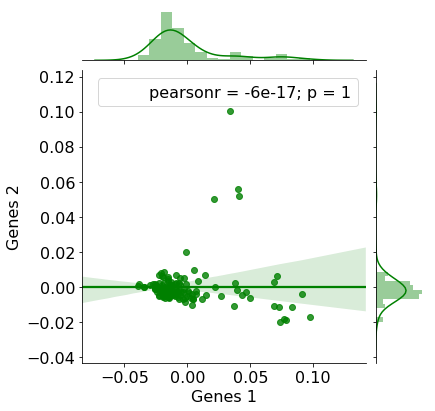

In [36]:
sns.jointplot(data=df_genes, x='Genes 1', y='Genes 2', kind='reg', color='g')

In [37]:
df_genes['Genes 1'].sort_values(ascending=False).head()

sub_structure
Putamen    0.097414
Putamen    0.090828
str_V1     0.083021
str_V1     0.078349
str_V1     0.076943
Name: Genes 1, dtype: float64

In [38]:
df_genes['Genes 2'].sort_values(ascending=False).head()

sub_structure
GP        0.100220
GP        0.055951
GP        0.051759
GP        0.049889
PoG-cs    0.019771
Name: Genes 2, dtype: float64

In [39]:
components = pd.DataFrame(pca.components_.T,
             index=df.index,
             columns=['PC %d' % (i+1) for i in range(pca.components_.shape[0])])
components.sort_values('PC 1',ascending=False).head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,PC 121
gene,,,,,,,,,,,,,,,,,,,,,
MTRNR2L2,0.832651,-0.204944,-0.146032,0.220771,-0.269041,0.094090,0.113169,0.065150,-0.116177,-0.150392,...,-0.001661,0.001179,-0.002141,-0.003288,-0.000431,0.000468,0.001740,0.000976,-0.000915,0.008233
MTRNR2L8,0.439166,-0.139282,0.457448,-0.509784,0.188358,-0.191691,-0.272774,-0.111795,0.131193,0.222930,...,0.002079,0.002922,-0.000473,0.002091,0.000084,-0.004010,-0.001332,0.001926,-0.002153,-0.002260
MBP,0.219736,0.931110,-0.019325,-0.050648,-0.130935,-0.036607,-0.064585,-0.102508,0.117699,0.035381,...,0.004916,-0.001855,0.002852,-0.001518,0.006051,0.000101,-0.001253,0.002075,0.000436,0.003182
MTRNR2L9,0.189360,-0.007728,-0.521096,0.132547,0.347852,0.193081,0.090834,-0.180696,0.326488,0.261121,...,0.000144,-0.006373,0.010617,0.002981,-0.001331,-0.007164,-0.000108,-0.006058,0.002202,-0.006328
MTRNR2L1,0.066652,-0.017206,0.024597,-0.061487,0.060871,-0.045082,-0.044536,-0.103441,-0.027885,0.000521,...,0.010920,-0.012817,0.021954,0.000796,0.007838,0.014877,-0.016597,-0.003894,0.028217,-0.044973


In [40]:
components.sort_values('PC 2',ascending=False).head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,PC 121
gene,,,,,,,,,,,,,,,,,,,,,
MBP,0.219736,0.931110,-0.019325,-0.050648,-0.130935,-0.036607,-0.064585,-0.102508,0.117699,0.035381,...,0.004916,-0.001855,0.002852,-0.001518,0.006051,0.000101,-0.001253,0.002075,0.000436,0.003182
GFAP,0.027078,0.150247,0.015073,0.014395,-0.038158,0.198512,-0.282169,0.093080,-0.230540,-0.342745,...,0.008673,0.009026,0.006811,-0.005511,0.000988,0.001067,0.006441,0.002338,-0.004888,-0.004982
PLP1,0.030468,0.094729,0.067634,-0.009852,-0.053916,-0.343531,0.522591,0.151353,-0.162656,0.224558,...,0.000553,0.024005,-0.006574,-0.026827,0.012796,0.019180,-0.013442,-0.013332,-0.006691,0.006063
APOE,0.025414,0.042408,-0.001850,-0.042939,0.201742,0.019854,-0.006462,0.132528,-0.022005,-0.194295,...,-0.032379,0.027926,-0.000161,0.018845,-0.000840,0.007737,0.018324,0.015596,0.007223,-0.014046
PTGDS,0.031629,0.038141,-0.029947,-0.037848,0.142592,-0.200219,0.067315,0.014015,-0.176370,-0.100393,...,0.013401,-0.005469,0.006181,0.026210,-0.011608,-0.006221,0.013429,0.008262,-0.003083,-0.009631
